# $$
\text{Résolution approchée des équations aux dérivées partielles}
$$

### Objectifs :

- résoudre l'équation de Poisson sur un segment par la méthode des différences finies ;
- résoudre numériquement l'équation de la chaleur par les méthodes des différences finies d'Euler explicite et implicite et mettre en évidence des instabilités numériques lorsque la condition de Courant-Friedrichs-Lewy n'est pas satisfaite.
- résoudre numériquement l'équation de transport linéaire à coefficients constants par la méthode des différences finies, avec dérivées en espace décentrées en amont, et mettre en évidence la stabilité de ce schéma si la condition de Courant-Friedrichs-Lewy est remplie, ainsi que l'instabilité numérique du schéma avec dérivées en espace décentrées en aval.

## I. Résolution de l'équation de Poisson par la méthode des différences finies

Étant donnée une fonction $f \in \mathcal{C}^0([a,b])$ et deux nombres réels $\alpha$ et $\beta$, considérons le problème de Dirichlet associée à l'équation de Poisson :

$$
\begin{cases} \forall a < x < b, \, -u''(x) = f(x), \\
u(a) = \alpha, \quad u(b) = \beta, \end{cases}
$$

et rappelons qu'il existe une unique solution $u \in \mathcal{C}^2([a, b])$ de ce problème. De plus, si $f$ est de classe $\mathcal{C}^k$ pour $k \geq 0$, alors la solution $u$ est de classe $\mathcal{C}^{k + 2}$.

Nous cherchons désormais à résoudre numériquement ce problème de Dirichlet. Pour $N\geq 1$, nous subdivisons le segment $[a, b]$ en $N + 1$ intervalles de taille $h = (b - a)/(N + 1)$ en posant
$$
\forall -1 \leq i \leq N, \, x_i = a + (i + 1) h.
$$
Le principe de la méthode est alors de calculer de façon approchée la valeur de la dérivée seconde $u''(x_i)$ à partir des valeurs $u(x_{i-1})$, $u(x_i)$ et $u(x_{i+1})$. Lorsque $u$ est de classe $\mathcal{C}^3$, nous pouvons appliquer la formule de Taylor pour obtenir :
$$
u(x_{i+1}) = u(x_i) + h u'(x_i) + \frac{h^2}{2} u''(x_i) + O(h)^3,
$$
lorsque $h$ tend vers $0$, et de manière similaire :
$$
u(x_{i-1}) = u(x_i) - h u'(x_i) + \frac{h^2}{2} u''(x_i) + O(h^3).
$$
Nous déduisons de ces expressions que
$$
u''(x_i) = \frac{u(x_{i-1}) - 2 u(x_i) + u(x_{i+1})}{h^2} + O(h).
$$
Nous utilisons alors ce développement pour approcher l'équation par :
$$
\frac{u(x_{i-1}) - 2 u(x_i) + u(x_{i+1})}{h^2} = f(x_i) + O(h).
$$
Nous pouvons donc définir une suite $(v_i)_{0 \leq i \leq N}$ qui va approcher les valeurs $(u(x_i))_{0 \leq i \leq N}$ de la façon suivante.

Pour $i = -1$, nous utilisons la condition de Dirichlet $u(x_{-1}) = \alpha$ et posons $v_{-1} = \alpha$. De même, nous posons $v_N = \beta$. Nous choisissons ensuite les valeurs $(v_i)_{0 \leq i \leq N-1}$ solutions des équations :
$$
\forall 0 \leq i \leq N - 1, \, - \frac{v_{i+1} - 2 v_i + v_{i-1}}{h^2} = f(x_i).
$$
La solution de ces équations est donnée par le vecteur $V = (v_0, \ldots, v_{N-1})$ solution de :
$$
M V = h^2 F,
$$
où
$$
M = \begin{pmatrix} 2 & -1 & 0 & \ldots & 0 \\
-1 & \ddots & \ddots & \ddots & \vdots\\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & -1\\
0 & \ldots & 0 & -1 & 2 \end{pmatrix} \quad \text{ et } \quad F = \begin{pmatrix}f(x_0) + \frac{\alpha}{h^2}\\ f(x_1) \\ \vdots \\ f(x_{N-2}) \\ f(x_{N-1}) + \frac{\beta}{h^2} \end{pmatrix}.
$$
Il est possible de vérifier que la matrice $M$ est symétrique définie positive, de sorte que ce système admet une unique solution. Nous pouvons ensuite déterminer cette solution a l'aide des diverses méthodes possibles pour la résolution approchée des systèmes linéaires. La fonction `poisson_dirichlet(f,a,b,alpha,beta,N)` suivante calcule la solution $V$ par cette méthode dite des différences finies :

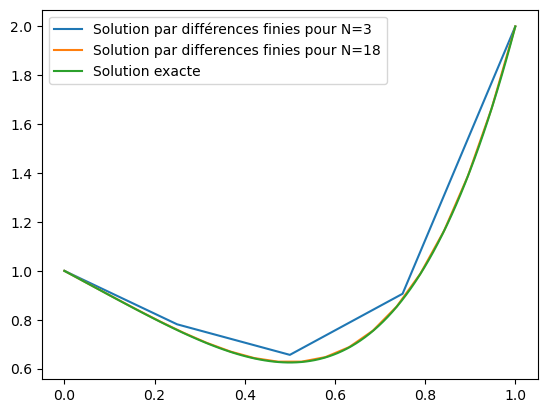

In [1]:
import numpy as np
def poisson_dirichlet(f,a,b,alpha,beta,N):
    Delta_x=(b-a)/(N+1)
    X=np.array([a+(i+1)*Delta_x for i in range(N)])   # crée le vecteur (x_0,...,x_{N-1})
    F=np.array([f(X[i]) for i in range(N)])     # crée le vecteur (f(x_0),...,f(x_{N-1}))
    F[0]=F[0]+alpha/((Delta_x)**2)
    F[N-1]=F[N-1]+beta/((Delta_x)**2)       
    M=2*np.identity(N)-np.eye(N,N,1)-np.eye(N,N,-1)   # crée la matrice M
    V=np.linalg.solve(M,(Delta_x**2)*F)               # calcule V en résolvant le systeme linéaire
    W=np.zeros(N+2)           # cette ligne et les deux suivantes créent le vecteur V
    W[0]=alpha
    W[N+1]=beta
    W[1:N+1]=V
    return W
# Test de la fonction poisson_dirichlet pour f(x)=-24x^2, a=0, b=1, alpha=1 et beta=2 dont la solution est u(x)=2x^4-x+1
from matplotlib import pyplot as plt
def f(x):
    return(-24*x**2)
x1=np.linspace(0,1,5)
x2=np.linspace(0,1,20)
V1=poisson_dirichlet(f,0,1,1,2,3) 
V2=poisson_dirichlet(f,0,1,1,2,18) 
x3=np.linspace(0,1,100)
U3=np.ones(100)-x3+2*x3**4
plt.plot(x1,V1,label="Solution par différences finies pour N=3")
plt.plot(x2,V2,label="Solution par differences finies pour N=18")
plt.plot(x3,U3,label="Solution exacte")
plt.legend()
plt.show()

## II. L'équation de la chaleur sur un segment $[a, b]$

### 1. Résolution théorique

Soit $a < b$ et $f \in \mathcal{C}^0([a, b])$. Considérons l'équation de la chaleur avec conditions de Dirichlet nulles au bord :

$$
\begin{cases}
\forall (x, t) \in ]a, b[ \times ]0, + \infty[, \, \partial_t u(x, t) - \partial_{xx} u(x, t) = f(x), \\
\forall t > 0, \, u(a, t) = 0 \quad \text{ et } \quad u(b, t) = 0, \\
\forall x \in ]a, b[, \, u(x, 0) = u_0(x).
\end{cases}
$$

Lorsque les fonctions $f$ et $u_0$ sont continues, cette équation possède les solutions classiques suivantes :

**Théorème.** Soit $(f, u_0) \in \mathcal{C}^0([a, b], \mathbb{R})^2$. Il existe une unique solution $u \in \mathcal{C}^0(]a, b[ \times [0, + \infty) \cup \{ a , b \} \times ]0 , +\infty[, \mathbb{R})$ de l'équation de la chaleur qui est de classe $\mathcal{C}^1$ par rapport à la variable $t$ et de classe $\mathcal{C}^2$ par rapport à la variable $x$.

C'est dans ce cadre fonctionnel que nous cherchons désormais à approcher numériquement la fonction $u$.

### 2. Résolution par la méthode des différences finies avec un schéma d'Euler explicite en temps

Nous souhaitons résoudre numériquement l'équation de la chaleur sur l'intervalle de temps $[0, T_0]$. Pour $N \geq 1$ et $K \geq 2$, nous posons
$$
\Delta x = \frac{b - a}{N + 1}, \quad \text{ et } \quad \Delta t = \frac{T_0}{K - 1},
$$
puis
$$
\forall -1 \leq i \leq N, \, x_i = a + (i + 1) \Delta x, \quad \text{ et } \quad \forall 0 \leq k \leq K -1, t_k = k\Delta t.
$$

Le principe est de calculer de manière approchée les dérivées $\partial_{xx} u(x_i, t_k)$ et $\partial_t u(x_i, t_k)$ en fonction de $u(x_{i - 1}, t_k)$, $u(x_i, t_k)$, $u(x_{i + 1}, t_k)$ et $u(x_i, t_{k + 1})$. Lorsque la solution $u$ est assez régulière, il résulte de la formule de Taylor que
$$
u(x_i, t_{k + 1}) = u(x_i, t_k) + \Delta t \partial_t u(x_i, t_k) + O \big( (\Delta t)^2 \big),
$$
soit
$$
\partial_t u(x_i, t_k) = \frac{u(x_i, t_{k + 1}) - u(x_i, t_k)}{\Delta t} + O(\Delta t).
$$
Rappelons également que
$$
\partial_{xx} u(x_i,t_k) = \frac{u(x_{i - 1}, t_k) - 2 u(x_i, t_k) + u(x_{i + 1}, t_k)}{(\Delta x)^2} + O(\Delta x),
$$
de sorte que
$$
\frac{u(x_i, t_{k + 1}) - u(x_i, t_k)}{\Delta t} + \frac{- u(x_{i - 1}, t_k) + 2 u(x_i, t_k) - u(x_{i + 1}, t_k)}{(\Delta x)^2} = f(x_i) + O(\Delta t + \Delta x).
$$

Nous approchons donc les valeurs $u(x_i, t_k)$ par les nombres $v_{i, k}$ donnés par le schéma aux différences finies suivant :
$$
\begin{cases}
\forall 0 \leq k \leq K - 1, \, v_{-1, k} = 0, \\
\forall 0 \leq k \leq K - 1, \, v_{N, k} = 0, \\
\forall 0 \leq k \leq K - 1, \forall 0 \leq i \leq N - 1, \, \frac{v_{i, k + 1} - v_{i, k}}{\Delta t} - \frac{v_{i + 1, k} -2 v_{i, k} + v_{i - 1, k}}{\Delta x^2} = f(x_i), \\
\forall 0 \leq i \leq N - 1, \, v_{i, 0} = u_0(x_i). 
\end{cases}
$$
La solution de ce système est donnée par la suite de vecteurs $(V_k)_{0 \leq k \leq K - 1}$ dans laquelle
$$
V_0 = \begin{pmatrix} u_0(x_0) \\ \vdots \\ u_0(x_{N - 1}) \end{pmatrix},
$$
et les vecteurs $V_k = {}^t (v_{0, k}, \ldots, v_{N - 1, k})$ satisfont :
$$
\forall 0 \leq k \leq K - 2, \, V_{k + 1} = V_k - \frac{\Delta t}{\Delta x^2} \, M V_k + \Delta t \, F,
$$
où :
$$
M = \begin{pmatrix} 2 & -1 & 0 & \ldots & 0 \\
- 1 & \ddots & \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & \ddots & \ddots & - 1 \\
0 & \ldots & 0 & -1 & 2
\end{pmatrix}, \quad \text{ et } \quad F = \begin{pmatrix} f(x_0) \\ f(x_1) \\ \vdots \\ f(x_{N - 2}) \\ f(x_{N-1}) \end{pmatrix}.
$$
La fonction `chaleur_eulerexplicite(a,b,T0,f,u0,N,K)` calcule les vecteurs $(V_k)_{0 \leq k \leq K - 1}$ par cette méthode :

In [2]:
def chaleur_eulerexplicite(a,b,T0,f,u0,N,K):
    Delta_x=(b-a)/(N+1)
    Delta_t=T0/(K-1)
    X=np.array([(i+1)*Delta_x for i in range(N)])
    F=np.array([f(X[i]) for i in range(N)])
    M=2*np.identity(N)-np.eye(N,N,1)-np.eye(N,N,-1)
    Vtilde=np.zeros([N,K])
    for i in range(N):
        Vtilde[i,0]=u0(X[i])
    for k in range(K-1):
        Vtilde[:,k+1]=Vtilde[:,k]-(Delta_t/Delta_x**2)*M@Vtilde[:,k]+Delta_t*F
    V=np.zeros([N+2,K])
    V[1:N+1,:]=Vtilde
    for k in range(K-1):
        V[0,k]=0
        V[N+1,k]=0
    return(V)

Nous illustrons l'emploi de la fonction `chaleur_eulerexplicite` pour $a = 0$, $b = 1$, l'exemple d'une fonction indicatrice comme donnée initiale
$$
u_0(x) = \begin{cases} 1, \quad \text{ si } |x - \frac{1}{2}| < \frac{1}{4}, \\ 0, \quad \text{sinon},
\end{cases}
$$
et pour un terme de forçage nul $f = 0$.

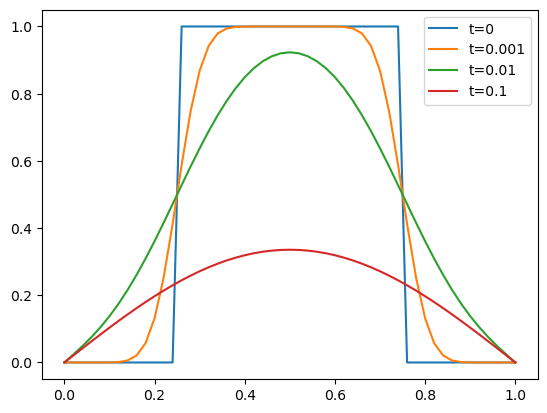

In [3]:
def u0_2(x):
    if abs(x-1/2)<1/4:
        return(1)
    else:
        return(0)
def f2(x):
    return(0)
x2=np.linspace(0,1,51)
V2=chaleur_eulerexplicite(0,1,1,f2,u0_2,49,10001)
V2_0=V2[:,0]
V2_1=V2[:,10]
V2_2=V2[:,100]
V2_3=V2[:,1000]
plt.plot(x2,V2_0,label="t=0")
plt.plot(x2,V2_1,label="t=0.001")
plt.plot(x2,V2_2,label="t=0.01")
plt.plot(x2,V2_3,label="t=0.1")
plt.legend()
plt.show()

Rappelons que la condition de Courant-Friedrichs-Lewy du schéma précédent est :
$$
\frac{\Delta t}{\Delta x^2} < \frac{1}{2}.
$$
Dans l'illustration numérique ci-dessus, nous vérfifions que
$$
\frac{\Delta t}{\Delta x^2} = \frac{1}{4},
$$
de sorte que cette condition est bien remplie. Lorsqu'elle n'est pas remplie, le schéma présente des instabilités numériques.

### 3. Résolution par la méthode des différences finies avec un schéma d'Euler implicite en temps

Nous souhaitons désormais résoudre numériquement l'équation de la chaleur par une méthode d'Euler implicite en temps. Pour $N \geq 1$ et $K \geq 2$, nous posons
$$
\Delta x = \frac{b - a}{N + 1}, \quad \text{ et } \quad \Delta t = \frac{T_0}{K - 1},
$$
puis
$$
\forall -1 \leq i \leq N, \, x_i = a + (i + 1) \Delta x, \quad \text{ et } \quad \forall 0 \leq k \leq K -1, t_k = k\Delta t.
$$

Lorsque la fonction $u$ est régulière, nous savons que
$$
\partial_{xx} u(x_i, t_k) = \partial_{xx} u(x_i, t_{k + 1}) + O(\Delta t),
$$
de sorte que
$$
\frac{u(x_i, t_{k + 1}) - u(x_i, t_k)}{\Delta t} + \frac{- u(x_{i - 1}, t_{k + 1}) + 2 u(x_i,t_{k + 1}) -u(x_{i + 1}, t_{k + 1})}{(\Delta x)^2} = f(x_i) + O(\Delta t + \Delta x).
$$
Nous approchons donc les valeurs $u(x_i, t_k)$ par des nombres $v_{i, k}$ suivant le schéma implicite en temps :
$$
\begin{cases}
\forall 0 \leq k \leq K - 1, \, v_{-1, k} = 0, \\
\forall 0 \leq k \leq K - 1, \, v_{N, k} = 0, \\
\forall 0 \leq k \leq K - 1, \, \forall 0 \leq i \leq N - 1, \, \frac{v_{i, k + 1} - v_{i, k}}{\Delta t} -\frac{v_{i + 1, k + 1} - 2 v_{i, k + 1} + v_{i - 1, k + 1}}{\Delta x^2} = f(x_i), \\
\forall 0 \leq i \leq N - 1, \, v_{i, 0} = u_0(x_i).
\end{cases}
$$
La solution de ce système est donnée par la suite de vecteurs $(V_k)_{0 \leq k \leq K - 1}$ dans laquelle :
$$
V_0 = \begin{pmatrix} u_0(x_0) \\ \vdots \\ u_0(x_{N - 1}) \end{pmatrix},
$$
et les vecteurs $V_k = {}^t (v_{0, k}, \ldots, v_{N - 1, k})$ satisfont :
$$
\forall 0 \leq k \leq K - 2, \, \big( I_N + \frac{\Delta t}{\Delta x^2} \, M \big) V_{k + 1} = V_k + \Delta t \, F,
$$
où
$$
M = \begin{pmatrix} 2 & -1 & 0 & \ldots & 0 \\
- 1 & \ddots & \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & \ddots & \ddots & - 1 \\
0 & \ldots & 0 & -1 & 2
\end{pmatrix}, \quad \text{ et } \quad F = \begin{pmatrix} f(x_0) \\ f(x_1) \\ \vdots \\ f(x_{N - 2}) \\ f(x_{N-1}) \end{pmatrix}.
$$
La fonction `chaleur_eulerexplicite(a,b,T0,f,u0,N,K)` calcule la solution $(V_k)_{0 \leq k \leq K-1}$ suivant cette méthode :

In [4]:
def chaleur_eulerimplicite(a,b,T0,f,u0,N,K):
    Delta_x=(b-a)/(N+1)
    Delta_t=T0/(K-1)
    X=np.array([(i+1)*Delta_x for i in range(N)])
    F=np.array([f(X[i]) for i in range(N)])
    M=2*np.identity(N)-np.eye(N,N,1)-np.eye(N,N,-1)
    matrice=np.identity(N)+(Delta_t/(Delta_x**2))*M
    Vtilde=np.zeros([N,K])
    for i in range(N):
        Vtilde[i,0]=u0(X[i])
    for k in range(K-1):
        Vtilde[:,k+1]=np.linalg.solve(matrice,Vtilde[:,k]+Delta_t*F)
    V=np.zeros([N+2,K])
    V[1:N+1,:]=Vtilde
    for k in range(K-1):
        V[0,k]=0
        V[N+1,k]=0
    return(V)

Nous illustrons l'emploi de la fonction `chaleur_eulerexplicite` pour $a=0$, $b=1$, l'exemple d'une donnée initiale nulle, et pour une fonction de forçage exponentielle.

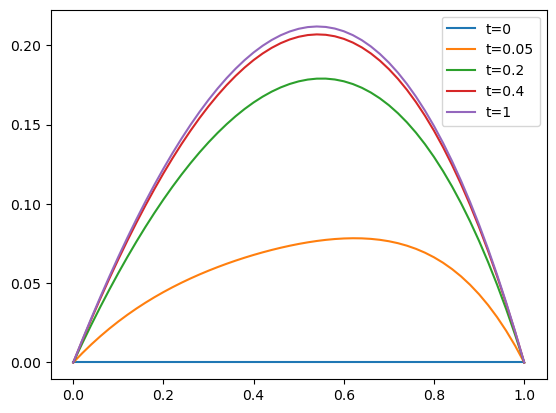

In [5]:
def u0_3(x):
    return(0)
def f3(x):
    return(np.exp(x))
x3=np.linspace(0,1,51)
V2=chaleur_eulerimplicite(0,1,1,f3,u0_3,49,101)
V2_0=V2[:,0]
V2_1=V2[:,5]
V2_2=V2[:,20]
V2_3=V2[:,40]
V2_4=V2[:,100]
plt.plot(x2,V2_0,label="t=0")
plt.plot(x2,V2_1,label="t=0.05")
plt.plot(x2,V2_2,label="t=0.2")
plt.plot(x2,V2_3,label="t=0.4")
plt.plot(x2,V2_4,label="t=1")
plt.legend()
plt.show()

Dans cet exemple, nous avons pu choisir $\Delta x = 1/50$ et $\Delta t = 1/100$. La condition de Courant-Friedrichs-Lewy du schéma d'Euler explicite n'est donc pas remplie car :
$$
\frac{\Delta t}{\Delta x^2} = 25 > \frac{1}{2}.
$$
Nous constatons néanmoins que le schéma numérique implicite n'a pas de problème d'instabilité. Ceci illustre numériquement le fait que le schéma d'Euler implicite est inconditionnellement stable : il n'y a pas besoin de contraintes sur les pas de discrétisation en temps et en espace, comme par exemple la condition de Courant-Friedrichs-Lewy, pour qu'il soit stable.

## III. L'équation de transport linéaire à coefficients constants

### 1. Résolution théorique

Considérons l'équation de transport linéaire sur $\mathbb{R}$ à vitesse constante $c \in \mathbb{R}$ :

$$
\begin{cases}
\forall (x, t) \in \mathbb{R} \times ]0, + \infty[, \, \partial_t u(x, t) + c \partial_x u(x, t) = 0,\\
\forall x \in \mathbb{R}, \, u(x, 0) = u_0(x).
\end{cases}
$$

Lorsque la fonction $u_0$ est de classe $\mathcal{C}^1$ sur $\mathbb{R}$, cette équation possède l'unique solution suivante :

**Théorème.** Soit $u_0 \in \mathcal{C}^1(\mathbb{R})$. Il existe une unique solution $u \in \mathcal{C}^1(\mathbb {R} \times [0, + \infty[)$ de l'équation de transport linéaire à vitesse constante $c$, et elle est donnée par la formule :
$$
\forall (x, t) \in \mathbb{R} \times [0, + \infty[, \, u(x, t) = u_0(x - c t).
$$

L'équation de transport modélise donc un phénomène d'advection : à l'instant $t$, la solution $u(x, t) = u_0(x - c t)$ est égale à une translation en espace d'un pas $c t$ de la donnée initiale $u_0$. La solution se déplace donc à vitesse $c$.

Considérons maintenant l'équation de transport linéaire sur le segment $[a, b]$. Lorsque $c > 0$, la solution tend à se déplacer vers la droite, tandis que si $c < 0$, elle tend à aller vers la gauche. Dans les deux cas, il semble donc nécessaire de prescrire la valeur de la solution qui rentre dans le segment $[a, b]$ : pour $c > 0$, nous ajoutons ainsi une condition au bord de Dirichlet en $a$, tandis que nous l'ajoutons en $b$ si $c < 0$. Pour $c > 0$, nous considérons donc le problème :

$$
\begin{cases}
\forall (x, t) \in ]a, b[ \times ]0, + \infty[, \, \partial_t u(x, t) + c \partial_x u(x, t) = 0,\\
\forall t \in ]0, + \infty[, u(a, t) = \alpha, \\
\forall x \in \mathbb{R}, \, u(x, 0) = u_0(x),
\end{cases}
$$

pour un nombre $\alpha \in \mathbb{R}$. Lorsque la fonction $u_0$ appartient à $L^1([a, b])$, ce problème possède également une unique solution (dans un sens faible à préciser) qui est donnée par la formule :
$$
u(x, t) = \begin{cases} u_0(x - c t) & \quad \text{ pour } x \geq a + c t, \\ \alpha & \quad \text{ pour } x < a + c t. \end{cases}
$$
La première ligne de cette formule correspond à la formule établie dans le cas de l'axe réel. Quant à la seconde ligne, elle s'explique par le fait que, si $x < a + c t$, alors à l'instant $t_0 = t - (x - a)/c$, la valeur $\alpha$ rentre en $x = a$, puis est transportée jusqu'en $a + c (t - t_0) = x$ au temps $t$.

### 2. Résolution numérique par la méthode des différences finies avec dérivées en espace en amont

Soit $c > 0$ et $\alpha \in \mathbb{R}$. Nous souhaitons résoudre numériquement l'équation de transport linéaire

$$
\begin{cases}
\forall (x, t) \in ]a, b[ \times ]0, + \infty[, \, \partial_t u(x, t) + c \partial_x u(x, t) = f(x), \\
\forall t \in ]0, + \infty[, \, u(a, t) = \alpha, \\
\forall x \in [a, b], \, u(x, 0) = u_0(x),
\end{cases}
$$

sur un intervalle de temps $[0, T_0]$. Pour $N \geq 1$ et $K \geq 2$, nous posons
$$
\Delta x = \frac{b - a}{N}, \quad \text{ et } \quad \Delta t = \frac{T_0}{K - 1},
$$
puis
$$
\forall -1 \leq i \leq N - 1, \, x_i = a + (i + 1) \Delta x, \quad \text{ et } \quad \forall 0 \leq k \leq K - 1, t_k = k\Delta t.
$$

Nous approchons la dérivée $\partial_t u(x_i, t_k)$ par une différence finie en aval en temps :
$$
\partial_t u(x_i, t_k) = \frac{u(x_i, t_{k+1}) - u(x_i, t_k)}{\Delta t} + O(\Delta t),
$$
tandis que nous approchons la dérivée $\partial_x u(x_i, t_k)$ par une différence finie décentrée en amont en espace. Pour $c > 0$, nous choisissons :
$$
\partial_x u(x_i, t_k) = \frac{u(x_i, t_k) - u(x_{i-1},t_k)}{\Delta x} + O(\Delta x).
$$
Ce choix découle du fait que les valeurs de la solution $u$ sont transportées vers la droite : la différence finie précédente fait intervenir $u(x_{i-1}, t_k)$ dans l'évolution de $u(x_i, t_k)$, ce qui est cohérent avec le sens du transport. Pour $c < 0$, nous aurions choisi :
$$
\partial_x u(x_i, t_k) = \frac{u(x_{i+1}, t_k) - u(x_i, t_k)}{\Delta x} + O(\Delta x).
$$

Nous obtenons l'approximation :
$$
\frac{u(x_i, t_{k+1}) - u(x_i, t_k)}{\Delta t} + c \frac{u(x_i,t_k) - u(x_{i-1}, t_k)}{\Delta x} = f(x_i) + O(\Delta t + \Delta x).
$$
Nous approchons donc les valeurs $u(x_i, t_k)$ par les nombres $v_{i, k}$ donnés par le schéma aux différences finies :
$$
\begin{cases}
\forall 0 \leq k \leq K - 1, \, v_{-1, k} = \alpha, \\
\forall 0 \leq k \leq K - 1, \, \forall 0 \leq i \leq N - 1, \, \frac{v_{i, k + 1} - v_{i, k}}{\Delta t} + c \frac{v_{i, k} - v_{i-1, k}}{\Delta x} = f(x_i), \\
\forall 0 \leq i \leq N - 1, \, v_{i, 0} = u_0(x_i).
\end{cases}
$$
La solution de ce schéma est donnée par la suite de vecteurs $(V_k)_{0 \leq k \leq K - 1}$ dans laquelle :
$$
V_0 = \begin{pmatrix} u_0(x_0) \\ \vdots \\ u_0(x_{N - 1}) \end{pmatrix},
$$
et les vecteurs $V_k = {}^t (v_{0, k}, \ldots, v_{N - 1, k})$ satisfont :
$$
\forall 0 \leq k \leq K - 2, \, V_{k + 1} = V_k - c \frac{\Delta t}{\Delta x} M \, V_k + \Delta t \, F,
$$
où
$$
M = \begin{pmatrix} 1 & 0 & \ldots & \ldots & 0 \\
-1 & \ddots & \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \vdots\\
\vdots & \ddots & \ddots & \ddots & 0 \\
0 & \ldots & 0 & -1 & 1
\end{pmatrix}, \quad \text{ et } \quad F = \begin{pmatrix} f(x_0) + \frac{c}{\Delta x} \alpha \\ f(x_1) \\ \vdots \\ f(x_{N - 2}) \\ f(x_{N-1}) \end{pmatrix}.
$$
La fonction `transport_amont(a,b,c,alpha,T0,f,u0,N,K)` calcule la solution $(V_k)_{0\leq k \leq K-1}$ donnée par cette méthode :

In [6]:
def transport_amont(a,b,c,alpha,f,u0,T0,N,K):
    Delta_x=(b-a)/(N)
    Delta_t=T0/(K-1)
    X=np.array([a+(i+1)*Delta_x for i in range(N)])
    F=np.array([f(X[i]) for i in range(N)])
    F[0]=f(X[0])+c*alpha/Delta_x
    M=np.identity(N)-np.eye(N,N,-1)
    Vtilde=np.zeros([N,K])
    for i in range(N):
        Vtilde[i,0]=u0(X[i])
    for k in range(K-1):
        Vtilde[:,k+1]=Vtilde[:,k]-c*Delta_t/Delta_x*M@Vtilde[:,k]+Delta_t*F
    V=np.zeros([N+1,K])
    V[1:N+1,:]=Vtilde
    for k in range(K-1):
        V[0,k]=alpha
    return(V)

Nous illustrons la fonction `transport_amont` pour $a = 0$, $b = 1$, $c = 0.2$, $\alpha = 5$, la donnée initiale $u_0(x) = x$, et le forçage nul $f = 0$.

Nous rappelons que la condition de Courant-Friedrichs-Lewy associée à ce schéma s'écrit :
$$
\frac{\Delta t}{\Delta x} < \frac{1}{c}.
$$
Dans cette illustration numérique, nous choisissons $\Delta x = 0.0001$ et $\Delta t = 0.00025$, de sorte que la condition de Courant-Friedrichs-Lewy est bien remplie
$$
\frac{\Delta t}{\Delta x} = 2.5 < \frac{1}{c} = 5.
$$

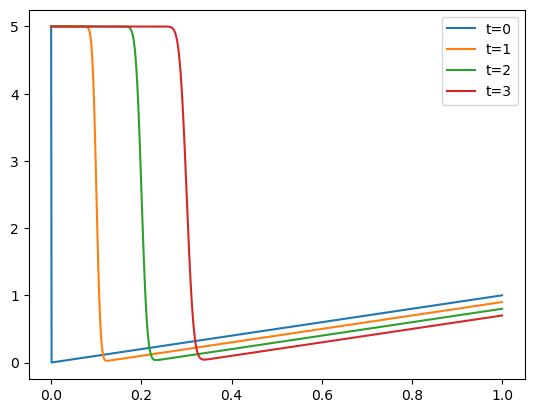

In [7]:
def u0_1(x):
    return(x)
def f1(x):
    return(0)
x2=np.linspace(0,1,1000)
V2=transport_amont(0,1,0.2,5,f1,u0_1,5,999,2001)
V2_0=V2[:,0]
V2_1=V2[:,200]
V2_2=V2[:,400]
V2_3=V2[:,600]
plt.plot(x2,V2_0,label="t=0")
plt.plot(x2,V2_1,label="t=1")
plt.plot(x2,V2_2,label="t=2")
plt.plot(x2,V2_3,label="t=3")
plt.legend()
plt.show()

Nous constatons que la solution calculée ressemble à celle donnée par la formule théorique.

Nous reprenons ensuite l'exemple précédent, mais avec $\Delta x= 1/100$ et $\Delta t = 1/19$, de sorte que la condition de Courant-Friedrichs-Lewy n'est pas remplie
$$
\frac{\Delta t}{\Delta x} = 5 + \frac{5}{19} > 5 =\frac{1}{c}.
$$

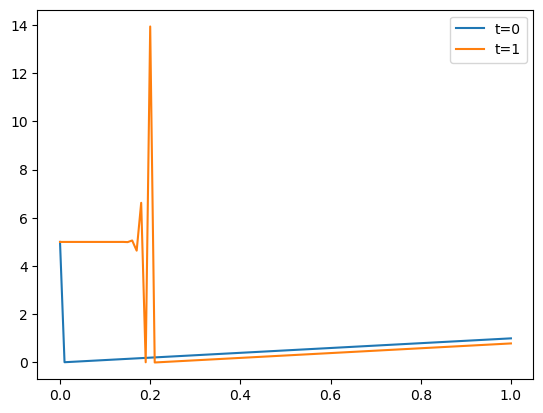

In [8]:
x3=np.linspace(0,1,101)
V3=transport_amont(0,1,0.2,5,f1,u0_1,5,100,96)
V3_0=V3[:,0]
V3_1=V3[:,20]
plt.plot(x3,V3_0,label="t=0")
plt.plot(x3,V3_1,label="t=1")
plt.legend()
plt.show()

Nous constatons alors que le schéma numérique est instable.


Afin de compléter l'étude du schéma avec dérivées en espace en amont, nous établissons sa convergence à l'ordre $1$ sous la condition de Courant-Friedrichs-Lewy. Nous commençons par écrire ce schéma sous la forme : 
$$
\forall 0 \leq k \leq K - 2, \, V_{k + 1} =  A \, V_k + \Delta t \, F,
$$
où
$$
A = \begin{pmatrix} 1 -c \frac{\Delta t}{\Delta x} & 0 & \ldots & \ldots & 0 \\
c \frac{\Delta t}{\Delta x} & \ddots & \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \vdots\\
\vdots & \ddots & \ddots & \ddots & 0 \\
0 & \ldots & 0 & c \frac{\Delta t}{\Delta x} & 1 - c \frac{\Delta t}{\Delta x}
\end{pmatrix}.
$$
Nous étudions ensuite la stabilité uniforme de ce schéma, soit pour la norme
$$
\forall V \in \mathbb{R}^N, \, \| V \|_\infty = \max_{0 \leq i \leq N-1} |V_i|.
$$

**Théorème.** Soit $c > 0$. Lorsque la condition de Courant-Friedrichs-Lewy
$$
\frac{\Delta t}{\Delta x} < \frac{1}{c},
$$
est satisfaite, le schéma avec dérivées en espace en amont est uniformément stable : quel que soit $T_0 > 0$, il existe une constante $C > 0$ telle que, quels que soient $\Delta t$ et $\Delta x$ assez petits, $V_0 \in \mathbb{R}^N$, et $F \in \mathbb {R}^N$, nous avons
$$
\forall 0 \leq k \leq K - 1, \, \| V_k \|_\infty \leq C \big( \| V_0 \|_\infty + \| F \|_\infty \big).
$$

**Preuve.** Soit $V \in \mathbb{R}^N$. Pour $i = 0$, nous avons
$$
(AV)_0 = \big( 1 - c \frac{\Delta t}{\Delta x} \big) V_0.
$$
Sachant que $0 < 1 - c \Delta t/\Delta x < 1$ par la condition de Courant-Friedrichs-Lewy, nous obtenons
$$
|(AV)_0| < |V_0| \leq \| V \|_\infty.
$$
De même, pour $1 \leq i \leq N - 1$,
$$
(A V)_i = c \frac{\Delta t}{\Delta x} V_{i - 1} + \big( 1 - c \frac{\Delta t}{\Delta x} \big) V_i,
$$
de sorte que
$$
|(A V)_i | \leq \| V \|_\infty,
$$
et nous concluons que
$$
\| A V \|_\infty \leq \| V \|_\infty.
$$

Nous obtenons donc
$$
\| V_{k + 1} \|_\infty \leq \| V_k \|_\infty + \Delta t \, \| F \|_\infty,
$$
puis par récurrence,
$$
\| V_k \|_\infty \leq \| V_0 \|_\infty + k \Delta t \, \| F \|_\infty.
$$
Comme $K \Delta t = T_0$, nous concluons que
$$
\| V_k \|_\infty \leq \| V_0 \|_\infty + T_0 \, \| F \|_\infty,
$$
ce qui achève la preuve du théorème.

Nous étudions ensuite la consistance et l'ordre du schéma.

**Définition.** Étant donnée une solution $u$ de l'équation de transport linéaire considérée, l'erreur de consistance au temps $t_k$ est le vecteur $\varepsilon_k$ définie par
$$
\forall 0 \leq i \leq N - 1, \, \varepsilon_{i, k} = u(x_i, t_k) - u(x_i, t_{k + 1}) - c \Delta t \, \frac{u(x_i, t_k) - u (x_{i-1}, t_k)}{\Delta x} + \Delta t \, f(x_i, t_k).
$$

**Théorème.** Le schéma est consistant d'ordre $1$ : étant donnée une solution $u$ de classe $\mathcal{C}^2$ de l'équation de transport linéaire considérée sur $[0, T_0]$, il existe un nombre $C > 0$ tel que, quels que soient $\Delta x$ et $\Delta t$ assez petits,
$$
\forall 0 \leq k \leq K - 1, \| \varepsilon_k \|_\infty \leq C \Delta t \, \big( \Delta t + \Delta x \big).
$$

**Preuve.**
Par la formule de Taylor avec reste intégral,
$$
u(x_i, t_{k+1}) - u(x_i, t_k) = \Delta t \, \partial_t u(x_i, t_k) + \int_{t_k}^{t_{k+1}} (t - t_k) \partial_{tt} u(x_i, t) \, dt = \Delta t \, \partial_t u(x_i, t_k) + O \big( (\Delta t)^2 \big),
$$
tandis que
$$
\frac{u(x_i, t_k) - u (x_{i-1}, t_k)}{\Delta x} = \partial_x u(x_i, t_k) + O(\Delta x).
$$
Nous obtenons donc
\begin{align*}
\varepsilon_{i, k} =  - \Delta t \, \partial_t u(x_i, t_k) + O \big( (\Delta t)^2 \big) - \Delta t \, c \partial_x u(x_i, t_k) + O \big( \Delta t \, \Delta x \big) = O \big( (\Delta t)^2 \big) + O \big( \Delta t \, \Delta x \big),
\end{align*}
ce qui montre que le schéma est consistant d'ordre $1$.

Comme dans le cas des méthodes de résolution des équations différentielles, consistance et stabilité assurent la convergence du schéma.

**Théorème.** Le schéma avec dérivées spatiales en amont est convergent d'ordre $1$ : étant donnée une solution $u$ de classe $\mathcal{C}^2$ de l'équation de transport linéaire considérée sur $[0, T_0]$, il existe un nombre $C > 0$ tel que, quels que soient $\Delta x$ et $\Delta t $ assez petits,
$$
\max_{0 \leq 1 \leq K, \, 0\leq i \leq N} \big| u(x_i, t_k) - v_{i, k} \big| \leq C \big( \Delta t + \Delta x \big).
$$

### 3. Instabilité de la méthode des différences finies avec dérivées en espace en aval

Nous allons implémenter le schéma des différences finies avec dérivées en espace en aval, afin de nous rendre compte qu'il est toujours instable, et qu'il faut donc toujours utiliser un schéma avec dérivées en espace en amont pour une équation de transport.

Pour $c > 0$, nous approchons désormais la dérivée $\partial_x u(x_i, t_k)$ par des différences finies décentrées en aval :
$$
\partial_x u(x_i, t_k) = \frac{u(x_{i+1}, t_k) - u(x_i, t_k)}{\Delta x} + O(\Delta x).
$$
Observons que cette différence finie fait intervenir $u(x_{i+1})$ dans l'évolution de $u(x_i)$, ce qui est incohérent avec le sens du transport.

De plus, cette approximation conduit à l'identité :
$$
\frac{u(x_i, t_{k+1}) - u(x_i, t_k)}{\Delta t} + c \frac{u(x_{i+1}, t_k) - u(x_i, t_k)}{\Delta x} = f(x_i) + O(\Delta t + \Delta x),
$$
qui n'a pas de sens pour $i = N-1$, puisque $x_{i+1} = x_N$ n'est pas défini. Le schéma en aval n'est donc déjà pas bien adapté pour les conditions au bord, et nous devons choisir une dérivée en amont en ce point pour $i = N-1$ :
$$
\frac{u(x_{N-1}, t_{k+1}) - u(x_{N-1}, t_k)}{\Delta t} + c \frac{u(x_{N-1}, t_k) - u(x_{N-2}, t_k)}{\Delta x} = f(x_i) + O(\Delta t+\Delta x).
$$

En définitive, nous approchons les valeurs $u(x_i, t_k)$ par des nombres $v_{i, k}$ tels que les vecteurs $V_k = {}^t (v_{0, k}, \ldots, v_{N - 1, k})^T$ sont donnés par les expressions :
$$
V_0 = \begin{pmatrix} u_0(x_0) \\ \vdots \\ u_0(x_{N-1}) \end{pmatrix},
$$
et
$$
\forall 0 \leq k \leq K-2, \, V_{k + 1} = V_k - c \frac{\Delta t}{\Delta x} \, M \, V_k + \Delta t \, F,
$$
où :
$$
M = \begin{pmatrix} -1 & 1 & 0 & \ldots & 0 \\
0 & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & \ldots & \ldots & 0 & -1
\end{pmatrix}, \quad \text{ et } \quad F = \begin{pmatrix} f(x_0) \\ f(x_1) \\ \vdots \\ f(x_{N - 2}) \\ f(x_{N-1}) \end{pmatrix}.
$$
La fonction `transport_aval(a,b,c,alpha,T0,f,u0,N,K)` calcule la solution $(V_k)_{0 \leq k \leq K-1}$ donnée par cette méthode :

In [9]:
def transport_aval(a,b,c,alpha,f,u0,T0,N,K):
    Delta_x=(b-a)/(N)
    Delta_t=T0/(K-1)
    X=np.array([a+(i+1)*Delta_x for i in range(N)])
    F=np.array([f(X[i]) for i in range(N)])
    M=-np.identity(N)+np.eye(N,N,1)
    M[N-1,N-1]=1
    M[N-1,N-2]=-1
    Vtilde=np.zeros([N,K])
    for i in range(N):
        Vtilde[i,0]=u0(X[i])
    for k in range(K-1):
        Vtilde[:,k+1]=Vtilde[:,k]-c*Delta_t/Delta_x*M@Vtilde[:,k]+Delta_t*F
    V=np.zeros([N+1,K])
    V[1:N+1,:]=Vtilde
    for k in range(K-1):
        V[0,k]=alpha
    return(V)

Nous illustrons l'instabilité de la fonction `transport_aval` pour $a = 0$, $b = 1$, $c = 0.2$, la donnée au bord $\alpha = 0$, la donnée initiale $u_0(x)=x^2$, et le forçage nul $f=0$.

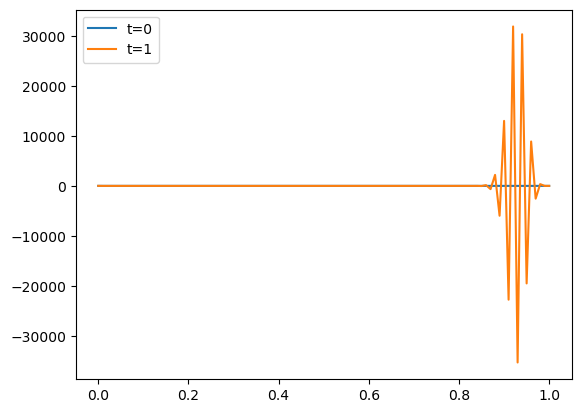

In [10]:
def f4(x):
    return(0)
def u0_4(x):
    return(x**2)
x4=np.linspace(0,1,101)
V4=transport_aval(0,1,0.2,5,f4,u0_4,5,100,96)
V4_0=V4[:,0]
V4_1=V4[:,20]
plt.plot(x4,V4_0,label="t=0")
plt.plot(x4,V4_1,label="t=1")
plt.legend()
plt.show()

## Exercices

### Exercice 1.

Nous cherchons à mettre en évidence numériquement l'ordre de convergence du schéma des différences finies pour l'équation de Poisson. Nous considérons l'exemple du segment $[0, 1]$, de la fonction $f(x) = \sin(x)$ et des conditions au bord $\alpha = 0$ et $\beta = \sin(1)$, pour lequel la solution explicite est
$$
\forall 0 \leq x \leq 1, \, u(x) = \sin(x).
$$
Étant donné un pas $h=1/(N + 1)$ pour la subdivision, nous définissons l'erreur par :
$$
\forall 0 \leq i \leq N-1, \, e_i(h) = u(x_i) - v_i = \sin(x_i) - v_i,
$$
où $(v_{-1}, \ldots, v_N)$ désigne la solution calculée par le schéma numérique `poisson_dirichlet(f,a,b,alpha,beta,N)` pour ce problème.

1. À l'aide de la routine `numpy.linalg.norm`, écrire une fonction `norme_erreur(N)` qui renvoie le nombre
$$
E_N = \max_{-1 \leq i \leq N} |e_i(h)|.
$$

In [11]:
def norme_erreur(N):
    V=poisson_dirichlet(np.sin,0,1,0,np.sin(1),N)
    U=np.array([np.sin(i/(N+1)) for i in range(N+2)])
    return np.linalg.norm(V-U,np.inf) 

2. À l'aide de la routine `matplotlib.pyplot.loglog`, représenter numériquement avec une échelle logarithmique la courbe de la fonction $N \mapsto E_N$ en fonction de l'entier $N$.

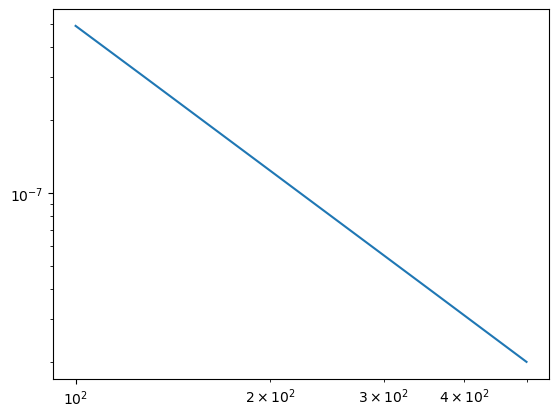

In [12]:
X=[]
Y=[]
for N in range(100,500):
    X.append(N)
    Y.append(norme_erreur(N))
plt.loglog(X,Y)
plt.show()

3. Déterminer à l'aide d'une régression linéaire la pente de la courbe de la fonction $\log(N) \mapsto \log(E_N)$. Quel est l'ordre de convergence du schéma obtenu empiriquement sur cet exemple ?

In [13]:
A=np.ones((len(X),2))
A[:,0]=np.log(X)
print('[Pente, Ordonnée à l origine] =',np.linalg.lstsq(A,np.log(Y),1e-15)[0],'\n')

[Pente, Ordonnée à l origine] = [-1.99125711 -5.35556553] 



La pente de la courbe de la fonction $\log(N) \mapsto \log(E_N)$ est de l'ordre de $-2$, ce qui signifie que :
$$
E_N \approx \frac{C}{N^2},
$$
pour un nombre $C > 0$. L'ordre de convergence du schéma des différences finies pour l'équation de Poisson est donc empiriquement égal à $2$, ce qui est cohérent avec le calcul théorique de cet ordre pour une fonction régulière.

### Exercice 2.

Nous nous proposons de résoudre le problème de Neumann pour l'équation de Poisson, avec condition sur la masse de la solution :

$$
\begin{cases} \forall a < x < b, \,-u''(x) = f(x), \\ u'(a) = \lambda, \quad u'(b) = \mu, \quad \int_a^b u(x)dx = m.
\end{cases}
$$

1. Vérifier que s'il existe une solution $u \in \mathcal{C}^2([a, b])$ de ce problème, alors la condition suivante de compatibilité est satisfaite :
$$
\int_a^b f(x) dx = \lambda - \mu.
$$

Étant donnée une solution $u \in \mathcal{C}^2([a, b])$, nous pouvons calculer
$$
\int_a^b f(x) \, dx = - \int_a^b u''(x) \, dx = u'(a) - u'(b),
$$
d'où nous obtenons la condition de compatibilité
$$
\int_a^b f(x) \, dx = \lambda - \mu.
$$

2. Nous supposons désormais que cette condition est satisfaite, et nous subdivisons le segment $[a, b]$ en $N$ intervalles de longueur $h = (b-a)/N$ en posant $x_i = a + i h$ pour $0 \leq i \leq N$. Nous résolvons numériquement le problème de Neumann en approchant les valeurs $(u(x_i))_{0 \leq i \leq N}$ par des nombres $(v_i)_{0 \leq i \leq N}$ qui satisfont aux identités suivantes :
$$
h \sum_{i = 0}^{N - 1} v_i = m,
$$
ainsi que
$$
\frac{v_N - v_{N-1}}{h} = \mu,
$$
et
$$
\forall 1 \leq i \leq N - 1, \, - \frac{v_{i+1} - 2 v_i + v_{i-1}}{h^2} = f(x_i).
$$
En posant $V = (v_0, \ldots, v_{N-1})$, écrire ces identités sous la forme 
$$
M V = F
$$
pour une matrice $M$ et un vecteur $F$ à déterminer.

Nous déduisons de la deuxième égalité ci-dessus que
$$
v_N = h \mu + v_{N - 1}.
$$
Sachant que
$$
2 v_{N - 1} - v_{N - 2} = v_N + h^2 f(x_{N - 1}),
$$
nous obtenons
$$
v_{N - 1} - v_{N - 2} = h \mu + h^2 f(x_{N -1}).
$$
En conclusion, nous pouvons écrire le système précédent sous la forme équivalente
$$
M V = F,
$$
dans laquelle
$$
M = \begin{pmatrix} 1 & \ldots & \ldots & \ldots & \ldots & 1 \\
-1 & 2 & - 1 & 0 & \ldots & 0\\
0 & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & \ddots & - 1 & 2 & -1\\
0 & \ldots & \ldots & 0 & -1 & 1 \end{pmatrix} \quad \text{ et } \quad F = \begin{pmatrix}\frac{m}{h} \\ h^2 f(x_1) \\ h^2 f(x_2) \\ \vdots \\ h^2 f(x_{N-2}) \\ h \mu + h^2 f(x_{N-1}) \end{pmatrix}.
$$

3. Nous admettons qu'il existe une unique solution de ce système linéaire. Écrire une fonction `poisson_neumann(f,a,b,mu,m,N)` qui calcule la solution approchée $V = (v_0, \ldots, v_N)$ en résolvant ce système linéaire.

In [14]:
def poisson_neumann(f,a,b,mu,m,N):
    Delta_x=(b-a)/N
    X=np.array([a+i*Delta_x for i in range(N)])
    F=np.array([(Delta_x**2)*f(X[i]) for i in range(N)])
    F[0]=m/Delta_x
    F[N-1]=F[N-1]+Delta_x*mu
    M=2*np.identity(N)-np.eye(N,N,1)-np.eye(N,N,-1)
    M[0,:]=np.ones((1,N))
    M[N-1,N-1]=1
    V=np.linalg.solve(M,F)
    W=np.append(V,np.array([V[N-1]+Delta_x*mu]))
    return W

4. Tester cette fonction dans le cas où $a = 0$, $b = 1$, $f(x) = - 2$, $\mu= 2$ et $m = 4/3$, et comparer avec la solution explicite $u(x) = x^2 + 1$.

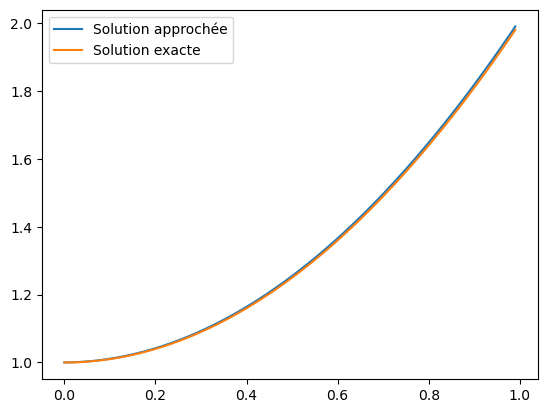

In [15]:
def f(x):
    return -2
P=poisson_neumann(f,0,1,2,4/3,100)[0:100]
X=np.array([i/100 for i in range(100)])
def u(x):
    return x**2+1
Y=u(X)
plt.plot(X,P,label='Solution approchée')
plt.plot(X,Y,label='Solution exacte')
plt.legend()
plt.show()

### Exercice 3 : instabilité du schéma d'Euler explicite si la condition de Courant-Friedrichs-Lewy n'est pas remplie.

1. Utiliser la fonction `chaleur_eulerexplicite` sur l'exemple de votre choix, mais avec des valeurs de $\Delta t$ et de $\Delta x$ telles que
$$
\frac{\Delta t}{(\Delta x)^2} \geq \frac {1}{2}.
$$

/tmp/ipykernel_25610/3681914248.py:11: RuntimeWarning: overflow encountered in matmul
  Vtilde[:,k+1]=Vtilde[:,k]-(Delta_t/Delta_x**2)*M@Vtilde[:,k]+Delta_t*F
/tmp/ipykernel_25610/3681914248.py:11: RuntimeWarning: invalid value encountered in matmul
  Vtilde[:,k+1]=Vtilde[:,k]-(Delta_t/Delta_x**2)*M@Vtilde[:,k]+Delta_t*F


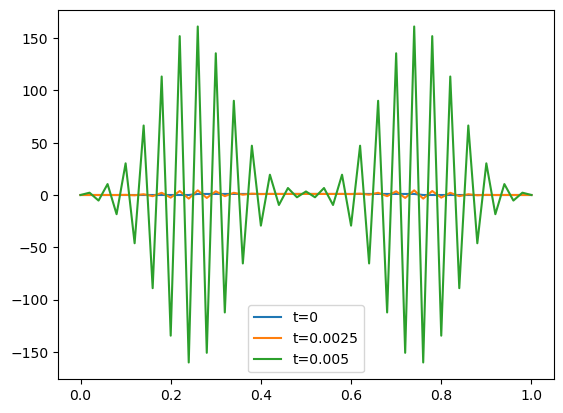

In [16]:
def u0(x):
    if abs(x-1/2)<1/4:
        return 1
    else:
        return 0
def f(x):
    return 0
X=np.linspace(0,1,51)
V=chaleur_eulerexplicite(0,1,1,f,u0,49,4001)
V0=V[:,0]
V1=V[:,10]
V2=V[:,20]
plt.plot(X,V0,label="t=0")
plt.plot(X,V1,label="t=0.0025")
plt.plot(X,V2,label="t=0.005")
plt.legend()
plt.show()

2. La méthode de résolution de l'équation de la chaleur par différences finies avec un schéma d'Euler explicite en temps est-elle stable si la condition de Courant-Friedrichs-Lewy n'est pas remplie ?

Dans l'exemple précédent, la condition de Courant-Friedrichs-Lewy n'est pas remplie puisque
$$
\frac{\Delta t}{(\Delta x)^2} = \frac{2500}{4000} = \frac{5}{8} \geq \frac {1}{2}.
$$
Les instabilités numériques illustrées par les graphes précédents suggèrent donc que le schéma d'Euler explicite en temps n'est plus stable lorsque cette condition n'est plus satisfaite.

### Exercice 4 : comportement en temps long de l'équation de la chaleur.

1.a. Sans forçage, soit pour $f = 0$, utiliser la fonction `chaleur_eulerexplicite` sur l'exemple de votre choix  pour représenter graphiquement la solution pour une suite de temps $t_0 < t_1 < \ldots < t_n$ de votre choix.

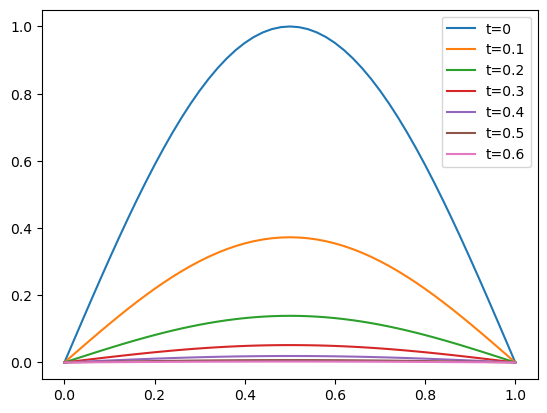

In [17]:
def u0(x):
    return np.sin(np.pi*x)
def f(x):
    return 0
X=np.linspace(0,1,51)
V=chaleur_eulerexplicite(0,1,1,f,u0,49,10001)
V0=V[:,0]
V1=V[:,1000]
V2=V[:,2000]
V3=V[:,3000]
V4=V[:,4000]
V5=V[:,5000]
V6=V[:,6000]
plt.plot(X,V0,label="t=0")
plt.plot(X,V1,label="t=0.1")
plt.plot(X,V2,label="t=0.2")
plt.plot(X,V3,label="t=0.3")
plt.plot(X,V4,label="t=0.4")
plt.plot(X,V5,label="t=0.5")
plt.plot(X,V6,label="t=0.6")
plt.legend()
plt.show()

b. En déduire numériquement le comportement de la solution de l'équation de la chaleur sans forçage lorsque $t \to + \infty$.

Nous observons numériquement que la solution de l'équation de la chaleur sans forçage semble tendre vers zéro lorsque $t \to + \infty$.

2.a Pour un forçage $f \neq 0$, utiliser à nouveau la fonction `chaleur_eulerexplicite` pour représenter graphiquement la solution pour une suite de temps $t_0 < t_1 < \ldots < t_n$ de votre choix.

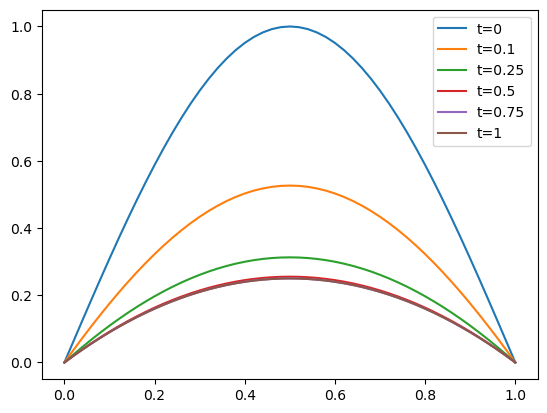

In [18]:
def g(x):
    return 2
W=chaleur_eulerexplicite(0,1,1,g,u0,49,10001)
W0=W[:,0]
W1=W[:,1000]
W2=W[:,2500]
W3=W[:,5000]
W4=W[:,8000]
W5=W[:,10000]
plt.plot(X,W0,label="t=0")
plt.plot(X,W1,label="t=0.1")
plt.plot(X,W2,label="t=0.25")
plt.plot(X,W3,label="t=0.5")
plt.plot(X,W4,label="t=0.75")
plt.plot(X,W5,label="t=1")
plt.legend()
plt.show()

b. Ajouter à la représentation graphique précédente la solution $v$ du problème

$$
\begin{cases}
\forall a < x < b, \, -v''(x) = f(x), \\
v(a) = v(b) = 0,
\end{cases}
$$

calculée numériquement à l'aide de la fonction `poisson_dirichlet`.

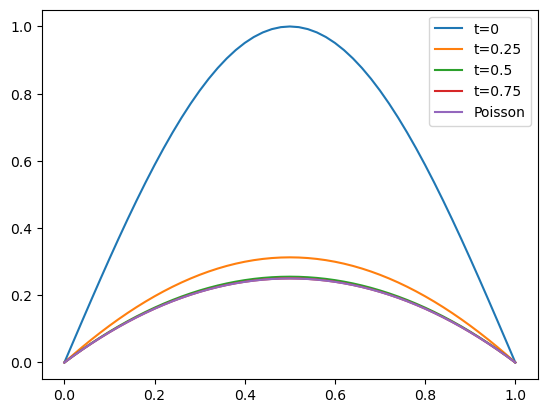

In [19]:
Y=poisson_dirichlet(g,0,1,0,0,49)
plt.plot(X,W0,label="t=0")
plt.plot(X,W2,label="t=0.25")
plt.plot(X,W3,label="t=0.5")
plt.plot(X,W4,label="t=0.75")
plt.plot(X,Y,label="Poisson")
plt.legend()
plt.show()

c. En déduire numériquement le comportement de la solution de l'équation de la chaleur avec forçage lorsque $t \to + \infty$.

Nous observons numériquement que la solution de l'équation de la chaleur avec forçage semble converger lorsque $t \to + \infty$ vers la solution du problème de Poisson avec le même terme de forçage.

### Exercice 5.

Nous souhaitons résoudre numériquement l'équation de la chaleur dans le cas de conditions de Dirichlet au bord, et d'un forçage qui dépend du temps :

$$
\begin{cases} \forall (x, t) \in ]a, b [ \times ]0, + \infty[, \, \frac{\partial u}{\partial t}(x, t) - \frac{\partial^2 u}{\partial x^2}(x, t) = f(x,t), \\
\forall t > 0, \, u(a, t) = \alpha, \quad \text{ et } \quad u(b, t) = \beta, \\
\forall x \in ]a, b[, \, u(x, 0) = u_0(x).
\end{cases}
$$

1. Reprener la fonction `chaleur_eulerexplicite` ou la fonction `chaleur_eulerimplicite` pour proposer un schéma numérique de résolution.

In [20]:
def chaleur_implicite_temp_forc(a,b,T0,f,alpha,beta,u0,N,K):
    Delta_x=(b-a)/(N+1)
    Delta_t=T0/(K-1)
    X=np.array([(i+1)*Delta_x for i in range(N)])
    M=2*np.identity(N)-np.eye(N,N,1)-np.eye(N,N,-1)
    matrice=np.identity(N)+(Delta_t/(Delta_x**2))*M
    Vtilde=np.zeros([N,K])
    for i in range(N):
        Vtilde[i,0]=u0(X[i])
    for k in range(K-1):
        F=np.array([f(X[i],k*Delta_t) for i in range(N)])
        F[0]=F[0]+alpha/(Delta_x)**2
        F[N-1]=F[N-1]+beta/(Delta_x)**2
        Vtilde[:,k+1]=np.linalg.solve(matrice,Vtilde[:,k]+Delta_t*F)
    V=np.zeros([N+2,K])
    V[1:N+1,:]=Vtilde
    for k in range(K-1):
        V[0,k]=alpha
        V[N+1,k]=beta
    return V

2. Illustrer votre code sur un exemple de votre choix.

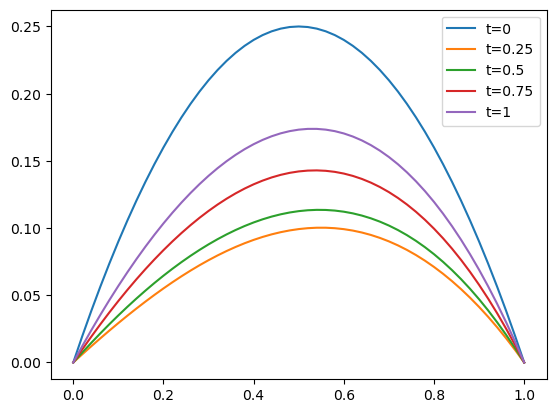

In [21]:
def f(x,t):
    return x+t
def u0(x):
    return x*(1-x)
X=np.linspace(0,1,51)
V=chaleur_implicite_temp_forc(0,1,1,f,0,0,u0,49,101)
V0=V[:,0]
V1=V[:,25]
V2=V[:,50]
V3=V[:,75]
V4=V[:,100]
plt.plot(X,V0,label="t=0")
plt.plot(X,V1,label="t=0.25")
plt.plot(X,V2,label="t=0.5")
plt.plot(X,V3,label="t=0.75")
plt.plot(X,V4,label="t=1")
plt.legend()
plt.show()

### Exercice 6.

Soit $c > 0$. Considérons le problème de Cauchy

$$
\begin{cases}
\forall (x, t) \in ]0, 1[ \times ]0, + \infty[, \, \frac{\partial u}{\partial t}(x, t) + c \frac{\partial u}{\partial x}(x, t) = f(x, t), \\
\forall t \in ]0, + \infty[, \, u(0, t) = \alpha(t), \\
\forall x \in [0, 1], \, u(x, 0) = u_0(x),
\end{cases}
$$

pour des fonctions $f : ]0, 1[ \times ]0, + \infty[ \to \mathbb{R}$, $\alpha : ]0, + \infty[ \to \mathbb{R}$ et $u_0 : [0, 1] \to \mathbb{R}$.

1. Adapter la méthode des différences finies avec dérivées en espace en amont pour résoudre numériquement ce problème de Cauchy.

In [22]:
def transport_amont_temp(a,b,c,alpha,f,u0,T0,N,K):
    Delta_x=(b-a)/(N)
    Delta_t=T0/(K-1)
    X=np.array([a+(i+1)*Delta_x for i in range(N)])
    M=np.identity(N)-np.eye(N,N,-1)
    Vtilde=np.zeros([N,K])
    for i in range(N):
        Vtilde[i,0]=u0(X[i])
    for k in range(K-1):
        F=np.array([f(X[i],k*Delta_t) for i in range(N)])
        F[0]=f(X[0],k*Delta_t)+c*alpha(k*Delta_t)/Delta_x
        Vtilde[:,k+1]=Vtilde[:,k]-c*Delta_t/Delta_x*M@Vtilde[:,k]+Delta_t*F
    V=np.zeros([N+1,K])
    V[1:N+1,:]=Vtilde
    for k in range(K-1):
        V[0,k]=alpha(k*Delta_t)
    return(V)

2. Tester ce schéma numérique sur l'exemple de votre choix.

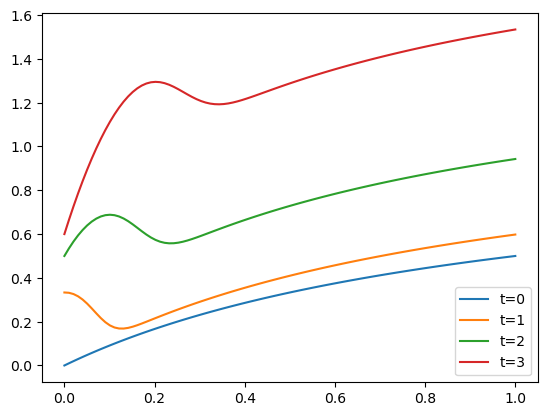

In [23]:
def u0(x):
    return x/(1+x)
def f(x,t):
    return t
def alpha(t):
    return t/(1+t)
X=np.linspace(0,1,100)
V=transport_amont_temp(0,1,0.2,alpha,f,u0,5,99,2001)
V0=V[:,0]
V1=V[:,200]
V2=V[:,400]
V3=V[:,600]
plt.plot(X,V0,label="t=0")
plt.plot(X,V1,label="t=1")
plt.plot(X,V2,label="t=2")
plt.plot(X,V3,label="t=3")
plt.legend()
plt.show()

### Exercice 7.

Considérons une solution positive $u : [0, 1] \times [0, + \infty[ \to [0, + \infty[$ de l'équation de Burgers :

$$
\begin{cases}
\forall (x, t) \in ]0, 1[ \times ]0, + \infty[, \, \frac{\partial u}{\partial t}(x, t) + u(t, x) \frac{\partial u}{\partial x}(x, t) = 0, \\
\forall t \in ]0, + \infty[, \, u(0, t) = 0, \\
\forall x \in [0, 1], \, u(x, 0) = u_0(x).
\end{cases}
$$

pour une fonction $u_0 : [0, 1] \to [0, + \infty[$.

1. Adapter la méthode des différences finies avec dérivées en espace en amont pour résoudre numériquement le problème ci-dessus.

In [24]:
def burgers_amont(a,b,u0,T0,N,K):
    Delta_x=(b-a)/N
    Delta_t=T0/(K-1)
    X=np.array([a+i*Delta_x for i in range(N+1)])
    V=np.zeros((N+1,K))
    for i in range(1,N+1):
        V[i,0]=u0(X[i])
    for k in range(K-1):
        for i in range(1,N+1):
            V[i,k+1]=V[i,k]*(1-Delta_t/(2*Delta_x)*V[i,k])+Delta_t/(2*Delta_x)*V[i-1,k]**2
    return V

2. Tester ce schéma numérique pour une fonction $u_0$ positive et croissante.

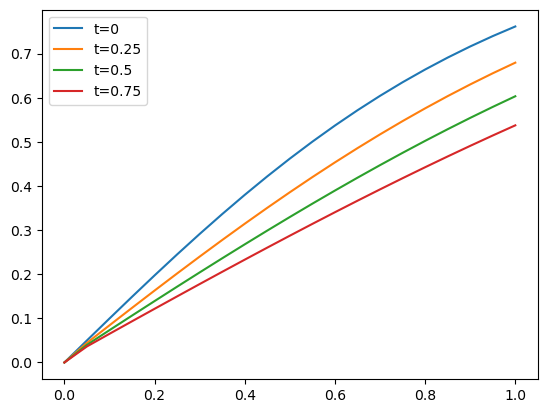

In [25]:
def u0(x):
    return np.tanh(x)
X=np.linspace(0,1,21)
V=burgers_amont(0,1,u0,1,20,1001)
V0=V[:,0]
V1=V[:,250]
V2=V[:,500]
V3=V[:,750]
plt.plot(X,V0,label="t=0")
plt.plot(X,V1,label="t=0.25")
plt.plot(X,V2,label="t=0.5")
plt.plot(X,V3,label="t=0.75")
plt.legend()
plt.show()

3. Tester ce schéma numérique pour une fonction positive $u_0$ dont la dérivée $u_0'$ est assez négative en un point.

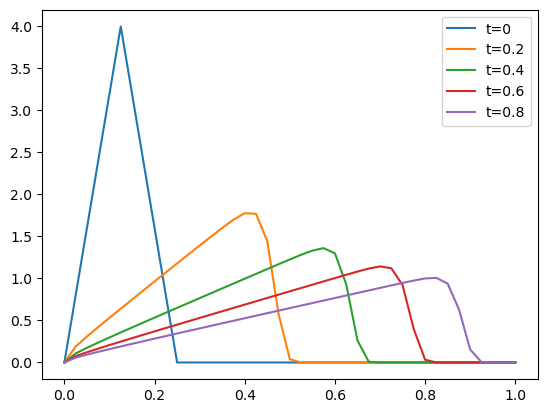

In [26]:
def u0(x):
    if x<1/8:
        return 32*x
    elif x<1/4:
        return 8-32*x
    else:
        return 0
X=np.linspace(0,1,41)
V=burgers_amont(0,1,u0,1,40,1001)
V0=V[:,0]
V1=V[:,200]
V2=V[:,400]
V3=V[:,600]
V4=V[:,800]
plt.plot(X,V0,label="t=0")
plt.plot(X,V1,label="t=0.2")
plt.plot(X,V2,label="t=0.4")
plt.plot(X,V3,label="t=0.6")
plt.plot(X,V4,label="t=0.8")
plt.legend()
plt.show()